In [1]:
import numpy as np
import warnings
import os
# os.environ["MODIN_ENGINE"] = "dask" 
import pandas as pd
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r"C:\Users\bhosl\Py Notebooks\BBMP OpenCity\BBMP_Spend_Extracts_2018_to_2023.xlsx")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head(4)

,slno,id,wodetails,contractor,brnumber,amount,nett,deduction,work,contractor_name,number,job_no,job_no_cleaned,Ward Num,year,Ward Name,AC num,AC Name,Parliamentary Constituency Name
0,1,132190,"<a href=""#"" onclick=""vssFillData(132190,'174-1...",M/s. KRIDL<br/>9480828220,BR - 000067 / 23-Dec-2017<br/>CBR - 008808 / 0...,11197236,10246036,951200,Construction and Remodeling of SWD 27th main B...,M/s. KRIDL,9480828220,174-17-000088,174-17-000088,174,2018,HSR Layout,175.0,BOMMANAHALLI,BANGALORE SOUTH
1,2,129900,"<a href=""#"" onclick=""vssFillData(129900,'094-1...",Technical Manager KRIDL West<br/>9483161122,BR - 000031 / 15-Dec-2017<br/>CBR - 008819 / 0...,19978729,18056814,1921915,Renavation of statistics Office building at wa...,Technical Manager KRIDL West,9483161122,094-17-000035,094-17-000035,94,2018,Gandhinagar,164.0,GANDHI NAGAR,BANGALORE CENTRAL
2,3,132627,"<a href=""#"" onclick=""vssFillData(132627,'068-1...",Executive Engineer KRIDL<br/>9611846039,BR - 000012 / 23-Dec-2017<br/>CBR - 008826 / 0...,7372590,6648140,724450,Improvements and Asphalting to Road from Mahal...,Executive Engineer KRIDL,9611846039,068-17-000151,068-17-000151,68,2018,Mahalakshimpuram,156.0,MAHALAXMI LAYOUT,BANGALORE NORTH
3,4,132698,"<a href=""#"" onclick=""vssFillData(132698,'040-1...",M/s.KRIDL<br/>9845235505,BR - 000287 / 26-Dec-2017<br/>CBR - 008827 / 0...,289434,263185,26249,Construction of compound wall and other infras...,M/s.KRIDL,9845235505,040-17-000117,040-17-000117,40,2018,Dodda Bidarakallu,153.0,YESHVANTHAPURA,BANGALORE NORTH


In [5]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import re
import texthero as hero
from texthero import stopwords

In [6]:
df = df[df["work"].notnull()] #excluding all nulls
df["work_lowercase"] = df["work"].str.lower() #lower case

In [7]:
preproc_keywords = {'pot holes': 'potholes',
    'dust bin': 'dustbin',
    'r.o. plants': 'ro plants',
    'dust bins': 'dustbins',
    'raod':'road',
    'street light': 'streetlight',
    'cc camera': 'cctv camera',
    'street lights': 'streetlights',
    'debries': 'debris',
    'construtcion': 'construction',
    'r o plant': 'ro plant',
    'c c tv': 'cctv',
    'r o plants': 'ro plants',
    'asphating': 'asphalting',
    'bore well': 'borewell',
    'pothole' : 'pothole',
    're surfacing': 'resurfacing',
    'improvmeents':' improvements',
    'pot hole': 'potholes',
    'de-silting':'desilting',
    'c c roads': 'cc roads',
    'c c road': 'cc road',
    'renavation': 'renovation',
    're-modelling': 'remodelling',
    'manitenance': 'maintenance',
    'constrcution': 'construction',
    'improvemets': 'improvements',
    'improvemnts': 'improvements',
    'imrovements': 'improvements',
    'imprivements': 'improvements',
    'imvprovements': 'improvements',
    '1119improvements': 'improvements',
    'improvementys': 'improvements',
    'improvmeent': 'improvements',
    'impts': 'improvements',
    'consultency': 'consultancy',
    'improvemenst': 'improvements',
    'imrovements': 'improvements',
    '2improvements':'improvements',
    '3improvements':'improvements',
    'improvemetns': 'improvements',
    'imporovements': 'improvements',
    'improvementing': 'improving',
    'improvments': 'improvements',
    'provdiding': 'providing',
    'provididng': 'providing',
    'providng': 'providing',
    'u g d': 'ugd',
    'u.g.d.': 'ugd',
    'pipe line': 'pipeline',
    're-modeling': 'remodeling',
    'proviing': 'providing',
    'provoding': 'providing',
    'upgradatin': 'upgrading',
    'proviidng': 'providing',
    'dovelopement': 'development',
    'developoment': 'development',
    'developmentsof': 'development of',
    'developemnt': 'development',
    'developement': 'development',
    'devlopment': 'development',
    'develpment': 'development',
    'mantainance': 'maintenance',
    'maintaianance': 'maintenance',
    'maintenace': 'maintenance',
    'maintanace': 'maintenance',
    'constructionn': 'construction',
    'consrtuction': 'construction',
    'maintenanceof': 'maintenance of',
    'maintainance': 'maintenance'}

In [8]:
'Consrtuction'.lower()

'consrtuction'

In [9]:
df["work_lowercase"] = df["work_lowercase"].replace(preproc_keywords, regex=True)

In [10]:
df["work_lowercase"] = df["work_lowercase"].str.replace(r"(?<!i)mprovements","improvements")

In [11]:
from texthero import preprocessing
custom_pipeline = [preprocessing.remove_diacritics, preprocessing.remove_whitespace]
df["work_lowercase"] = hero.clean(df["work_lowercase"], custom_pipeline)

In [12]:
# List of keywords to extract
work_list = ['roads and drains', 'water', 'drain', 'street lights', 'street light', 'led lights',\
             'streetlight', 'streetlighting', 'streetlights', 'led lighting', 'illumination',\
             'poles', 'road and drain', 'drain and road', 'buildings','building', 'toilet', 'park',\
             'burial ground','ro plant',\
             'cctv','emergency', 'grants','cc roads', 'water supply',"pothole", "potholes",\
             'roads', 'drains', 'play grounds', 'parks', 'gym', 'indira canteen', "basketball court", \
             'community toilets', 'toilets','drinking water', 'borewell', 'culverts',\
             'ugd', 'compound wall', 'pot hole', 'pipeline', 'desilting', 'silt', 'asphalting',\
            'electric poles', 'depot', 'footpath','excavation', 'swd','borewells',\
             'cleaning', 'deweeding', 'dustbins', 'debris','debris clearance', 'waste','road',\
            'cctv camera', 'fencing', 'led streetlights', 'electrification']

# Function to extract keywords from Sentences column
def extract_keywords(sentence):
    extracted_keywords = []
    for keyword in work_list:
        # Use regular expression to find exact matches of keywords in the sentence
        if re.search(r"\b" + re.escape(keyword) + r"\b", sentence, re.IGNORECASE):
            extracted_keywords.append(keyword)
    if len(extracted_keywords) == 0:  # If no keywords found, return "NA"
        return np.NaN
    else:
        return ', '.join(extracted_keywords)  # Join the keywords with a comma
    
# Apply the function to the Sentences column
df["keywords"] = df["work_lowercase"].apply(extract_keywords)

In [13]:
df[df['work_lowercase'].str.contains("led ")]['work'][25725]

'Consultancy services for Preparation of Detailed Project Report for the works in Ward No. 100(3 Works).'

df[df['work'].str.contains("roads and drains")].sample(5)

In [14]:
temp = df.copy()
temp['slno'] = pd.to_numeric(temp['slno'])

In [15]:
temp

,slno,id,wodetails,contractor,brnumber,amount,nett,deduction,work,contractor_name,number,job_no,job_no_cleaned,Ward Num,year,Ward Name,AC num,AC Name,Parliamentary Constituency Name,work_lowercase,keywords
0,1,132190,"<a href=""#"" onclick=""vssFillData(132190,'174-1...",M/s. KRIDL<br/>9480828220,BR - 000067 / 23-Dec-2017<br/>CBR - 008808 / 0...,11197236,10246036,951200,Construction and Remodeling of SWD 27th main B...,M/s. KRIDL,9480828220,174-17-000088,174-17-000088,174,2018,HSR Layout,175.0,BOMMANAHALLI,BANGALORE SOUTH,construction and remodeling of swd 27th main b...,swd
1,2,129900,"<a href=""#"" onclick=""vssFillData(129900,'094-1...",Technical Manager KRIDL West<br/>9483161122,BR - 000031 / 15-Dec-2017<br/>CBR - 008819 / 0...,19978729,18056814,1921915,Renavation of statistics Office building at wa...,Technical Manager KRIDL West,9483161122,094-17-000035,094-17-000035,94,2018,Gandhinagar,164.0,GANDHI NAGAR,BANGALORE CENTRAL,renovation of statistics office building at wa...,building
2,3,132627,"<a href=""#"" onclick=""vssFillData(132627,'068-1...",Executive Engineer KRIDL<br/>9611846039,BR - 000012 / 23-Dec-2017<br/>CBR - 008826 / 0...,7372590,6648140,724450,Improvements and Asphalting to Road from Mahal...,Executive Engineer KRIDL,9611846039,068-17-000151,068-17-000151,68,2018,Mahalakshimpuram,156.0,MAHALAXMI LAYOUT,BANGALORE NORTH,improvements and asphalting to road from mahal...,"asphalting, road"
3,4,132698,"<a href=""#"" onclick=""vssFillData(132698,'040-1...",M/s.KRIDL<br/>9845235505,BR - 000287 / 26-Dec-2017<br/>CBR - 008827 / 0...,289434,263185,26249,Construction of compound wall and other infras...,M/s.KRIDL,9845235505,040-17-000117,040-17-000117,40,2018,Dodda Bidarakallu,153.0,YESHVANTHAPURA,BANGALORE NORTH,construction of compound wall and other infras...,"burial ground, compound wall"
4,5,132070,"<a href=""#"" onclick=""vssFillData(132070,'089-1...",Manjunath D<br/>8022975812,BR - 000076 / 22-Dec-2017<br/>CBR - 008828 / 0...,3191400,3093470,97930,Essential repairs and improvements to class ro...,Manjunath D,8022975812,089-17-000034,089-17-000034,89,2018,Jogupalya,163.0,SHANTI NAGAR,BANGALORE CENTRAL,essential repairs and improvements to class ro...,toilets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44684,1489,557863,"<a href=""#"" onclick=""vssFillData(557863,'132-1...",024025 ROHITH H<br/>9916643566,BR - 000057 / 08-Dec-2022<br/>CBR - / <br/>Rt...,9317950,8282940,1035010,Construction of commercial complex in Vijayana...,024025 ROHITH H,9916643566,132-19-000035,132-19-000035,132,2023,Attiguppe,167.0,VIJAYA NAGAR,BANGALORE SOUTH,construction of commercial complex in vijayana...,NaN
44685,1490,560091,"<a href=""#"" onclick=""vssFillData(560091,'044-2...",023050 SKBASAVARAJU<br/>9448372828,BR - 000269 / 28-Dec-2022<br/>CBR - / <br/>Rt...,75225685,68710668,6515017,Package-6 comprehensive development of buildin...,023050 SKBASAVARAJU,9448372828,044-23-000001,044-23-000001,44,2023,Marappana Palya,156.0,MAHALAXMI LAYOUT,BANGALORE NORTH,package-6 comprehensive development of buildin...,buildings
44686,1491,560239,"<a href=""#"" onclick=""vssFillData(560239,'307-2...",ACR PROJECTS<br/>9663555588,BR - 000104 / 19-Dec-2022<br/>CBR - / <br/>Rt...,26012000,25056988,955012,Construction and Remodeling of Primary Seconda...,ACR PROJECTS,9663555588,307-20-000020,307-20-000020,307,2023,NaN,NaN,NaN,NaN,construction and remodeling of primary seconda...,"drains, culverts, swd"
44687,1492,561667,"<a href=""#"" onclick=""vssFillData(561667,'307-2...",STAR INFRATECH<br/>9845866476,BR - 000106 / 28-Dec-2022<br/>CBR - / <br/>Rt...,11329920,10673571,656349,Construction and Remodeling of PrimarySecondar...,STAR INFRATECH,9845866476,307-20-000002,307-20-000002,307,2023,NaN,NaN,NaN,NaN,construction and remodeling of primarysecondar...,"drains, swd"


In [16]:
df[['work', 'keywords']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 44688
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   work      44689 non-null  object
 1   keywords  38771 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [17]:
df['keywords'].value_counts()

roads and drains, roads, drains              3434
road                                         1951
roads                                        1562
streetlights                                 1487
streetlighting                               1203
                                             ... 
asphalting, depot, road                         1
drain, emergency, grants, roads, culverts       1
park, waste, road                               1
water, asphalting, road                         1
illumination, poles, park                       1
Name: keywords, Length: 1267, dtype: int64

In [18]:
df[['work', 'keywords']]['work'][44688]

'Improvement to road drain and asphalting to 05 Selected Arterial Sub Arterial roads and other connecting roads in Mahadevapura Zone RI-KRP Package-01'

In [19]:
sel_col = ['work', 'keywords', 'work_lowercase', 'status']

In [20]:
# df[df['keywords'].isna()][sel_col].to_csv("Missing_Keywords_v2.csv", index=False)

In [21]:
# List of keywords to extract
work_list = ['development', 'completed', 'improvement', 'improvements',\
             'construction', 'renovation','restoration','maintenance', 'resurfacing',\
            'providing', 'developments', 'consultancy services', 'remodelling',\
             'upgradation', 'developmental', 'repairs', 'improving', 'upgrading']

# Function to extract keywords from Sentences column
def extract_keywords(sentence):
    extracted_keywords = []
    for keyword in work_list:
        # Use regular expression to find exact matches of keywords in the sentence
        if re.search(r"\b" + re.escape(keyword) + r"\b", sentence, re.IGNORECASE):
            extracted_keywords.append(keyword)
    if len(extracted_keywords) == 0:  # If no keywords found, return "NA"
        return np.NaN
    else:
        return ', '.join(extracted_keywords)  # Join the keywords with a comma

# Apply the function to the Sentences column
df["status"] = df["work_lowercase"].apply(extract_keywords)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 44688
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   slno                             44689 non-null  int64  
 1   id                               44689 non-null  int64  
 2   wodetails                        44689 non-null  object 
 3   contractor                       44689 non-null  object 
 4   brnumber                         44689 non-null  object 
 5   amount                           44689 non-null  int64  
 6   nett                             44689 non-null  int64  
 7   deduction                        44689 non-null  int64  
 8   work                             44689 non-null  object 
 9   contractor_name                  44689 non-null  object 
 10  number                           44689 non-null  int64  
 11  job_no                           44689 non-null  object 
 12  job_no_cleaned    

In [23]:
df[['work','keywords','status','slno']]

,work,keywords,status,slno
0,Construction and Remodeling of SWD 27th main B...,swd,construction,1
1,Renavation of statistics Office building at wa...,building,renovation,2
2,Improvements and Asphalting to Road from Mahal...,"asphalting, road",improvements,3
3,Construction of compound wall and other infras...,"burial ground, compound wall",construction,4
4,Essential repairs and improvements to class ro...,toilets,"improvements, repairs",5
...,...,...,...,...
44684,Construction of commercial complex in Vijayana...,NaN,construction,1489
44685,Package-6 comprehensive development of buildin...,buildings,development,1490
44686,Construction and Remodeling of Primary Seconda...,"drains, culverts, swd",construction,1491
44687,Construction and Remodeling of PrimarySecondar...,"drains, swd",construction,1492


In [24]:
df['status'].value_counts()

improvements                                      9629
providing                                         7889
maintenance                                       5545
construction                                      3698
development                                       2130
                                                  ... 
development, consultancy services, repairs           1
improvements, construction, upgradation              1
development, renovation, providing                   1
improvement, resurfacing, consultancy services       1
development, improvements, providing, repairs        1
Name: status, Length: 220, dtype: int64

In [25]:
preprocess_lvl2 = {"road":"roads",
                  "drain":"drains",
                  "borewell":"borewells",
                  "cc road":"cc roads",
                  "borewell":"borewells",
                  "pothole":"potholes",
                   "street light":"street lights",
                   "streetlight":'streetlights',
                  "road and drain":"roads and drains"}

In [26]:
df['keywords'] = df['keywords'].replace(preprocess_lvl2)

In [27]:
df['keywords'] = df['keywords'].str.replace(r'\broad\b', 'roads')
df['keywords'] = df['keywords'].str.replace(r'\bpothole\b', 'potholes')
df['keywords'] = df['keywords'].str.replace(r'\bpot hole\b', 'potholes')

In [28]:
df['keywords'].value_counts()

roads                                       3513
roads and drains, roads, drains             3434
streetlights                                2450
drains                                      1860
drain, roads                                1288
                                            ... 
cctv, cctv camera, electrification             1
building, park, borewells                      1
cc roads, roads, drains, pipeline              1
ugd, asphalting, roads                         1
drain, park, asphalting, footpath, roads       1
Name: keywords, Length: 1227, dtype: int64

In [29]:
df['terms'] = df['keywords'].str.split(',\s*')

def get_max_occurence(row):
    tc = pd.Series(row['terms']).dropna().value_counts()
    max_occ = tc.idxmax() if not tc.empty else None
    return max_occ

df['max_occ'] = df.apply(get_max_occurence, axis=1)

In [30]:
df = df.drop(['terms'], axis=1)
df

,slno,id,wodetails,contractor,brnumber,amount,nett,deduction,work,contractor_name,number,job_no,job_no_cleaned,Ward Num,year,Ward Name,AC num,AC Name,Parliamentary Constituency Name,work_lowercase,keywords,status,max_occ
0,1,132190,"<a href=""#"" onclick=""vssFillData(132190,'174-1...",M/s. KRIDL<br/>9480828220,BR - 000067 / 23-Dec-2017<br/>CBR - 008808 / 0...,11197236,10246036,951200,Construction and Remodeling of SWD 27th main B...,M/s. KRIDL,9480828220,174-17-000088,174-17-000088,174,2018,HSR Layout,175.0,BOMMANAHALLI,BANGALORE SOUTH,construction and remodeling of swd 27th main b...,swd,construction,swd
1,2,129900,"<a href=""#"" onclick=""vssFillData(129900,'094-1...",Technical Manager KRIDL West<br/>9483161122,BR - 000031 / 15-Dec-2017<br/>CBR - 008819 / 0...,19978729,18056814,1921915,Renavation of statistics Office building at wa...,Technical Manager KRIDL West,9483161122,094-17-000035,094-17-000035,94,2018,Gandhinagar,164.0,GANDHI NAGAR,BANGALORE CENTRAL,renovation of statistics office building at wa...,building,renovation,building
2,3,132627,"<a href=""#"" onclick=""vssFillData(132627,'068-1...",Executive Engineer KRIDL<br/>9611846039,BR - 000012 / 23-Dec-2017<br/>CBR - 008826 / 0...,7372590,6648140,724450,Improvements and Asphalting to Road from Mahal...,Executive Engineer KRIDL,9611846039,068-17-000151,068-17-000151,68,2018,Mahalakshimpuram,156.0,MAHALAXMI LAYOUT,BANGALORE NORTH,improvements and asphalting to road from mahal...,"asphalting, roads",improvements,asphalting
3,4,132698,"<a href=""#"" onclick=""vssFillData(132698,'040-1...",M/s.KRIDL<br/>9845235505,BR - 000287 / 26-Dec-2017<br/>CBR - 008827 / 0...,289434,263185,26249,Construction of compound wall and other infras...,M/s.KRIDL,9845235505,040-17-000117,040-17-000117,40,2018,Dodda Bidarakallu,153.0,YESHVANTHAPURA,BANGALORE NORTH,construction of compound wall and other infras...,"burial ground, compound wall",construction,burial ground
4,5,132070,"<a href=""#"" onclick=""vssFillData(132070,'089-1...",Manjunath D<br/>8022975812,BR - 000076 / 22-Dec-2017<br/>CBR - 008828 / 0...,3191400,3093470,97930,Essential repairs and improvements to class ro...,Manjunath D,8022975812,089-17-000034,089-17-000034,89,2018,Jogupalya,163.0,SHANTI NAGAR,BANGALORE CENTRAL,essential repairs and improvements to class ro...,toilets,"improvements, repairs",toilets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44684,1489,557863,"<a href=""#"" onclick=""vssFillData(557863,'132-1...",024025 ROHITH H<br/>9916643566,BR - 000057 / 08-Dec-2022<br/>CBR - / <br/>Rt...,9317950,8282940,1035010,Construction of commercial complex in Vijayana...,024025 ROHITH H,9916643566,132-19-000035,132-19-000035,132,2023,Attiguppe,167.0,VIJAYA NAGAR,BANGALORE SOUTH,construction of commercial complex in vijayana...,NaN,construction,None
44685,1490,560091,"<a href=""#"" onclick=""vssFillData(560091,'044-2...",023050 SKBASAVARAJU<br/>9448372828,BR - 000269 / 28-Dec-2022<br/>CBR - / <br/>Rt...,75225685,68710668,6515017,Package-6 comprehensive development of buildin...,023050 SKBASAVARAJU,9448372828,044-23-000001,044-23-000001,44,2023,Marappana Palya,156.0,MAHALAXMI LAYOUT,BANGALORE NORTH,package-6 comprehensive development of buildin...,buildings,development,buildings
44686,1491,560239,"<a href=""#"" onclick=""vssFillData(560239,'307-2...",ACR PROJECTS<br/>9663555588,BR - 000104 / 19-Dec-2022<br/>CBR - / <br/>Rt...,26012000,25056988,955012,Construction and Remodeling of Primary Seconda...,ACR PROJECTS,9663555588,307-20-000020,307-20-000020,307,2023,NaN,NaN,NaN,NaN,construction and remodeling of primary seconda...,"drains, culverts, swd",construction,swd
44687,1492,561667,"<a href=""#"" onclick=""vssFillData(561667,'307-2...",STAR INFRATECH<br/>9845866476,BR - 000106 / 28-Dec-2022<br/>CBR - / <br/>Rt...,11329920,10673571,656349,Construction and Remodeling of PrimarySecondar...,STAR INFRATECH,9845866476,307-20-000002,307-20-000002,307,2023,NaN,NaN,NaN,NaN,construction 

In [31]:
df['max_occ'].value_counts()

roads                9601
roads and drains     3434
drain                2551
water                2531
streetlights         2469
drains               1939
footpath             1339
park                 1224
streetlighting       1203
building             1019
asphalting            989
swd                   847
borewells             819
ugd                   782
emergency             722
desilting             611
potholes              598
culverts              570
toilet                435
gym                   379
parks                 360
borewell              310
debris                309
led streetlights      305
cc roads              291
indira canteen        258
water supply          248
cctv camera           246
waste                 235
toilets               217
burial ground         211
buildings             193
fencing               177
pipeline              165
ro plant              137
grants                133
silt                  118
compound wall         104
led lights  

In [32]:
df['keywords'].value_counts()

roads                                       3513
roads and drains, roads, drains             3434
streetlights                                2450
drains                                      1860
drain, roads                                1288
                                            ... 
cctv, cctv camera, electrification             1
building, park, borewells                      1
cc roads, roads, drains, pipeline              1
ugd, asphalting, roads                         1
drain, park, asphalting, footpath, roads       1
Name: keywords, Length: 1227, dtype: int64

In [33]:
df[df['status'].isna()]

,slno,id,wodetails,contractor,brnumber,amount,nett,deduction,work,contractor_name,number,job_no,job_no_cleaned,Ward Num,year,Ward Name,AC num,AC Name,Parliamentary Constituency Name,work_lowercase,keywords,status,max_occ
16,17,132226,"<a href=""#"" onclick=""vssFillData(132226,'304-1...",K Sohanraj<br/>8192258283,BR - 000125 / 22-Dec-2017<br/>CBR - 008811 / 0...,6247644,6116444,131200,Supply of Kitchen Equipments to Indira Canteen,K Sohanraj,8192258283,304-18-000005,304-18-000005,304,2018,NaN,NaN,NaN,NaN,supply of kitchen equipments to indira canteen,indira canteen,NaN,indira canteen
17,18,129983,"<a href=""#"" onclick=""vssFillData(129983,'058-1...",S Sunil Kumar<br/>0123456789,BR - 000035 / 13-Dec-2017<br/>CBR - 008796 / 0...,953051,766000,187051,"Pot holes filling for 515 Colony, Puttappa C...",S Sunil Kumar,123456789,058-17-000019,058-17-000019,58,2018,New Tippasandara,161.0,C.V. RAMAN NAGAR (SC),BANGALORE CENTRAL,"potholes filling for 515 colony, puttappa colo...",potholes,NaN,potholes
20,21,126122,"<a href=""#"" onclick=""vssFillData(126122,'161-1...","SRI V. Mayura, M/s.Goutham Constrictions<br/>9...",BR - 000062 / 25-Nov-2017<br/>CBR - 008799 / 0...,494220,434690,59530,Patchwork for Pothole and road cutting filling...,"SRI V. Mayura, M/s.Goutham Constrictions",9900100668,161-17-000039,161-17-000039,161,2018,Hosakerehalli,171.0,PADMANABA NAGAR,BANGALORE SOUTH,patchwork for pothole and road cutting filling...,"potholes, roads, roads",NaN,roads
24,25,112724,"<a href=""#"" onclick=""vssFillData(112724,'198-1...",M/S.KRIDL<br/>9845235505,BR - 000153 / 27-Sep-2017<br/>CBR - 008803 / 0...,1739803,1513326,226477,Shifting of UGD lines coming in metro allgment...,M/S.KRIDL,9845235505,198-17-000060,198-17-000060,198,2018,Hemmigepura,153.0,YESHVANTHAPURA,BANGALORE NORTH,shifting of ugd lines coming in metro allgment...,"ugd, roads",NaN,ugd
25,26,112725,"<a href=""#"" onclick=""vssFillData(112725,'198-1...",M/S.KRIDL<br/>9845235505,BR - 000151 / 27-Sep-2017<br/>CBR - 008804 / 0...,3404638,2973536,431102,Shifting of UGD lines coming in metro allgment...,M/S.KRIDL,9845235505,198-17-000061,198-17-000061,198,2018,Hemmigepura,153.0,YESHVANTHAPURA,BANGALORE NORTH,shifting of ugd lines coming in metro allgment...,"ugd, roads",NaN,ugd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44591,1396,410730,"<a href=""#"" onclick=""vssFillData(410730,'156-1...",VINYAS BUILDERS<br/>9900673673,BR - 000029 / 22-Jul-2021<br/>CBR - / <br/>Rt...,2084600,1559850,524750,Pot Hole Filling in Ward No-156 Srinagara.,VINYAS BUILDERS,9900673673,156-18-000029,156-18-000029,156,2023,Srinagar,170.0,BASAVANAGUDI,BANGALORE SOUTH,potholes filling in ward no-156 srinagara.,potholes,NaN,potholes
44597,1402,305308,"<a href=""#"" onclick=""vssFillData(305308,'310-1...",KRIDL BHUSIRI ACCOU<br/>0000000000,BR - 000144 / 26-Dec-2019<br/>CBR - / <br/>Rt...,769971,313123,456848,Internal CC road and drains work at Doddahejj...,KRIDL BHUSIRI ACCOU,0,310-16-000165,310-16-000165,310,2023,NaN,NaN,NaN,NaN,internal cc road and drains work at doddahejja...,"drains, roads",NaN,roads
44598,1403,402882,"<a href=""#"" onclick=""vssFillData(402882,'104-1...",SRICHAMUNDESHWARIELE<br/>9448762931,BR - 000084 / 20-Jan-2021<br/>CBR - / <br/>Rt...,4637032,4410480,226552,Additional works for Electrificational works ...,SRICHAMUNDESHWARIELE,9448762931,104-19-000028,104-19-000028,104,2023,Govindaraja Nagar,166.0,GOVINDRAJA NAGAR,BANGALORE SOUTH,additional works for electrificational works t...,building,NaN,building
44600,1405,558845,"<a href=""#"" onclick=""vssFillData(558845,'304-1...",R K INFRACORP PRIVAT<br/>9448050627,BR - 000036 / 13-Dec-2022<br/>CBR - / <br/>Rt...,19762880,18491427,1271453,Widening of Bannerghatta main road from Jedima...,R K INFRACORP PRIVAT,9448050627,304-18-000008,304-18-000008,304,2023,NaN,NaN,NaN,NaN,widening of bannerghatta main road from jedima...,roads,NaN,roads


In [34]:
df['terms_status'] = df['status'].str.split(',\s*')

def get_max_occurence_status(row):
    tc = pd.Series(row['terms_status']).dropna().value_counts()
    max_occ = tc.idxmax() if not tc.empty else None
    return max_occ

df['status_max_occ'] = df.apply(get_max_occurence_status, axis=1)

In [35]:
df

,slno,id,wodetails,contractor,brnumber,amount,nett,deduction,work,contractor_name,number,job_no,job_no_cleaned,Ward Num,year,Ward Name,AC num,AC Name,Parliamentary Constituency Name,work_lowercase,keywords,status,max_occ,terms_status,status_max_occ
0,1,132190,"<a href=""#"" onclick=""vssFillData(132190,'174-1...",M/s. KRIDL<br/>9480828220,BR - 000067 / 23-Dec-2017<br/>CBR - 008808 / 0...,11197236,10246036,951200,Construction and Remodeling of SWD 27th main B...,M/s. KRIDL,9480828220,174-17-000088,174-17-000088,174,2018,HSR Layout,175.0,BOMMANAHALLI,BANGALORE SOUTH,construction and remodeling of swd 27th main b...,swd,construction,swd,[construction],construction
1,2,129900,"<a href=""#"" onclick=""vssFillData(129900,'094-1...",Technical Manager KRIDL West<br/>9483161122,BR - 000031 / 15-Dec-2017<br/>CBR - 008819 / 0...,19978729,18056814,1921915,Renavation of statistics Office building at wa...,Technical Manager KRIDL West,9483161122,094-17-000035,094-17-000035,94,2018,Gandhinagar,164.0,GANDHI NAGAR,BANGALORE CENTRAL,renovation of statistics office building at wa...,building,renovation,building,[renovation],renovation
2,3,132627,"<a href=""#"" onclick=""vssFillData(132627,'068-1...",Executive Engineer KRIDL<br/>9611846039,BR - 000012 / 23-Dec-2017<br/>CBR - 008826 / 0...,7372590,6648140,724450,Improvements and Asphalting to Road from Mahal...,Executive Engineer KRIDL,9611846039,068-17-000151,068-17-000151,68,2018,Mahalakshimpuram,156.0,MAHALAXMI LAYOUT,BANGALORE NORTH,improvements and asphalting to road from mahal...,"asphalting, roads",improvements,asphalting,[improvements],improvements
3,4,132698,"<a href=""#"" onclick=""vssFillData(132698,'040-1...",M/s.KRIDL<br/>9845235505,BR - 000287 / 26-Dec-2017<br/>CBR - 008827 / 0...,289434,263185,26249,Construction of compound wall and other infras...,M/s.KRIDL,9845235505,040-17-000117,040-17-000117,40,2018,Dodda Bidarakallu,153.0,YESHVANTHAPURA,BANGALORE NORTH,construction of compound wall and other infras...,"burial ground, compound wall",construction,burial ground,[construction],construction
4,5,132070,"<a href=""#"" onclick=""vssFillData(132070,'089-1...",Manjunath D<br/>8022975812,BR - 000076 / 22-Dec-2017<br/>CBR - 008828 / 0...,3191400,3093470,97930,Essential repairs and improvements to class ro...,Manjunath D,8022975812,089-17-000034,089-17-000034,89,2018,Jogupalya,163.0,SHANTI NAGAR,BANGALORE CENTRAL,essential repairs and improvements to class ro...,toilets,"improvements, repairs",toilets,"[improvements, repairs]",improvements
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44684,1489,557863,"<a href=""#"" onclick=""vssFillData(557863,'132-1...",024025 ROHITH H<br/>9916643566,BR - 000057 / 08-Dec-2022<br/>CBR - / <br/>Rt...,9317950,8282940,1035010,Construction of commercial complex in Vijayana...,024025 ROHITH H,9916643566,132-19-000035,132-19-000035,132,2023,Attiguppe,167.0,VIJAYA NAGAR,BANGALORE SOUTH,construction of commercial complex in vijayana...,NaN,construction,None,[construction],construction
44685,1490,560091,"<a href=""#"" onclick=""vssFillData(560091,'044-2...",023050 SKBASAVARAJU<br/>9448372828,BR - 000269 / 28-Dec-2022<br/>CBR - / <br/>Rt...,75225685,68710668,6515017,Package-6 comprehensive development of buildin...,023050 SKBASAVARAJU,9448372828,044-23-000001,044-23-000001,44,2023,Marappana Palya,156.0,MAHALAXMI LAYOUT,BANGALORE NORTH,package-6 comprehensive development of buildin...,buildings,development,buildings,[development],development
44686,1491,560239,"<a href=""#"" onclick=""vssFillData(560239,'307-2...",ACR PROJECTS<br/>9663555588,BR - 000104 / 19-Dec-2022<br/>CBR - / <br/>Rt...,26012000,25056988,955012,Construction and Remodeling of Primary Seconda...,ACR PROJECTS,9663555588,307-20-000020,307-20-000020,307,2023,NaN,NaN,NaN,NaN,construction and remodeling of primary seconda...,"drains, culverts, swd",construction,swd,[construction],construction
44687,1492,561667,"<a href=""#"" onclick=""vssFillData

In [36]:
df.status_max_occ.value_counts()

improvements            12959
providing                9886
maintenance              5922
construction             4201
development              2484
improvement              1226
restoration               719
repairs                   431
consultancy services      214
remodelling               186
developments              165
developmental             137
renovation                136
resurfacing               109
upgradation                68
upgrading                  37
improving                  17
Name: status_max_occ, dtype: int64

In [37]:
df[df['status'].isna()][sel_col]

,work,keywords,work_lowercase,status
16,Supply of Kitchen Equipments to Indira Canteen,indira canteen,supply of kitchen equipments to indira canteen,NaN
17,"Pot holes filling for 515 Colony, Puttappa C...",potholes,"potholes filling for 515 colony, puttappa colo...",NaN
20,Patchwork for Pothole and road cutting filling...,"potholes, roads, roads",patchwork for pothole and road cutting filling...,NaN
24,Shifting of UGD lines coming in metro allgment...,"ugd, roads",shifting of ugd lines coming in metro allgment...,NaN
25,Shifting of UGD lines coming in metro allgment...,"ugd, roads",shifting of ugd lines coming in metro allgment...,NaN
...,...,...,...,...
44591,Pot Hole Filling in Ward No-156 Srinagara.,potholes,potholes filling in ward no-156 srinagara.,NaN
44597,Internal CC road and drains work at Doddahejj...,"drains, roads",internal cc road and drains work at doddahejja...,NaN
44598,Additional works for Electrificational works ...,building,additional works for electrificational works t...,NaN
44600,Widening of Bannerghatta main road from Jedima...,roads,widening of bannerghatta main road from jedima...,NaN


In [38]:
df

,slno,id,wodetails,contractor,brnumber,amount,nett,deduction,work,contractor_name,number,job_no,job_no_cleaned,Ward Num,year,Ward Name,AC num,AC Name,Parliamentary Constituency Name,work_lowercase,keywords,status,max_occ,terms_status,status_max_occ
0,1,132190,"<a href=""#"" onclick=""vssFillData(132190,'174-1...",M/s. KRIDL<br/>9480828220,BR - 000067 / 23-Dec-2017<br/>CBR - 008808 / 0...,11197236,10246036,951200,Construction and Remodeling of SWD 27th main B...,M/s. KRIDL,9480828220,174-17-000088,174-17-000088,174,2018,HSR Layout,175.0,BOMMANAHALLI,BANGALORE SOUTH,construction and remodeling of swd 27th main b...,swd,construction,swd,[construction],construction
1,2,129900,"<a href=""#"" onclick=""vssFillData(129900,'094-1...",Technical Manager KRIDL West<br/>9483161122,BR - 000031 / 15-Dec-2017<br/>CBR - 008819 / 0...,19978729,18056814,1921915,Renavation of statistics Office building at wa...,Technical Manager KRIDL West,9483161122,094-17-000035,094-17-000035,94,2018,Gandhinagar,164.0,GANDHI NAGAR,BANGALORE CENTRAL,renovation of statistics office building at wa...,building,renovation,building,[renovation],renovation
2,3,132627,"<a href=""#"" onclick=""vssFillData(132627,'068-1...",Executive Engineer KRIDL<br/>9611846039,BR - 000012 / 23-Dec-2017<br/>CBR - 008826 / 0...,7372590,6648140,724450,Improvements and Asphalting to Road from Mahal...,Executive Engineer KRIDL,9611846039,068-17-000151,068-17-000151,68,2018,Mahalakshimpuram,156.0,MAHALAXMI LAYOUT,BANGALORE NORTH,improvements and asphalting to road from mahal...,"asphalting, roads",improvements,asphalting,[improvements],improvements
3,4,132698,"<a href=""#"" onclick=""vssFillData(132698,'040-1...",M/s.KRIDL<br/>9845235505,BR - 000287 / 26-Dec-2017<br/>CBR - 008827 / 0...,289434,263185,26249,Construction of compound wall and other infras...,M/s.KRIDL,9845235505,040-17-000117,040-17-000117,40,2018,Dodda Bidarakallu,153.0,YESHVANTHAPURA,BANGALORE NORTH,construction of compound wall and other infras...,"burial ground, compound wall",construction,burial ground,[construction],construction
4,5,132070,"<a href=""#"" onclick=""vssFillData(132070,'089-1...",Manjunath D<br/>8022975812,BR - 000076 / 22-Dec-2017<br/>CBR - 008828 / 0...,3191400,3093470,97930,Essential repairs and improvements to class ro...,Manjunath D,8022975812,089-17-000034,089-17-000034,89,2018,Jogupalya,163.0,SHANTI NAGAR,BANGALORE CENTRAL,essential repairs and improvements to class ro...,toilets,"improvements, repairs",toilets,"[improvements, repairs]",improvements
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44684,1489,557863,"<a href=""#"" onclick=""vssFillData(557863,'132-1...",024025 ROHITH H<br/>9916643566,BR - 000057 / 08-Dec-2022<br/>CBR - / <br/>Rt...,9317950,8282940,1035010,Construction of commercial complex in Vijayana...,024025 ROHITH H,9916643566,132-19-000035,132-19-000035,132,2023,Attiguppe,167.0,VIJAYA NAGAR,BANGALORE SOUTH,construction of commercial complex in vijayana...,NaN,construction,None,[construction],construction
44685,1490,560091,"<a href=""#"" onclick=""vssFillData(560091,'044-2...",023050 SKBASAVARAJU<br/>9448372828,BR - 000269 / 28-Dec-2022<br/>CBR - / <br/>Rt...,75225685,68710668,6515017,Package-6 comprehensive development of buildin...,023050 SKBASAVARAJU,9448372828,044-23-000001,044-23-000001,44,2023,Marappana Palya,156.0,MAHALAXMI LAYOUT,BANGALORE NORTH,package-6 comprehensive development of buildin...,buildings,development,buildings,[development],development
44686,1491,560239,"<a href=""#"" onclick=""vssFillData(560239,'307-2...",ACR PROJECTS<br/>9663555588,BR - 000104 / 19-Dec-2022<br/>CBR - / <br/>Rt...,26012000,25056988,955012,Construction and Remodeling of Primary Seconda...,ACR PROJECTS,9663555588,307-20-000020,307-20-000020,307,2023,NaN,NaN,NaN,NaN,construction and remodeling of primary seconda...,"drains, culverts, swd",construction,swd,[construction],construction
44687,1492,561667,"<a href=""#"" onclick=""vssFillData

In [39]:
# df[df['status'].isna()][sel_col].to_csv("Missing_Status_v2.csv", index=False)

In [40]:
df = df.drop(['terms_status'], axis=1)
df

,slno,id,wodetails,contractor,brnumber,amount,nett,deduction,work,contractor_name,number,job_no,job_no_cleaned,Ward Num,year,Ward Name,AC num,AC Name,Parliamentary Constituency Name,work_lowercase,keywords,status,max_occ,status_max_occ
0,1,132190,"<a href=""#"" onclick=""vssFillData(132190,'174-1...",M/s. KRIDL<br/>9480828220,BR - 000067 / 23-Dec-2017<br/>CBR - 008808 / 0...,11197236,10246036,951200,Construction and Remodeling of SWD 27th main B...,M/s. KRIDL,9480828220,174-17-000088,174-17-000088,174,2018,HSR Layout,175.0,BOMMANAHALLI,BANGALORE SOUTH,construction and remodeling of swd 27th main b...,swd,construction,swd,construction
1,2,129900,"<a href=""#"" onclick=""vssFillData(129900,'094-1...",Technical Manager KRIDL West<br/>9483161122,BR - 000031 / 15-Dec-2017<br/>CBR - 008819 / 0...,19978729,18056814,1921915,Renavation of statistics Office building at wa...,Technical Manager KRIDL West,9483161122,094-17-000035,094-17-000035,94,2018,Gandhinagar,164.0,GANDHI NAGAR,BANGALORE CENTRAL,renovation of statistics office building at wa...,building,renovation,building,renovation
2,3,132627,"<a href=""#"" onclick=""vssFillData(132627,'068-1...",Executive Engineer KRIDL<br/>9611846039,BR - 000012 / 23-Dec-2017<br/>CBR - 008826 / 0...,7372590,6648140,724450,Improvements and Asphalting to Road from Mahal...,Executive Engineer KRIDL,9611846039,068-17-000151,068-17-000151,68,2018,Mahalakshimpuram,156.0,MAHALAXMI LAYOUT,BANGALORE NORTH,improvements and asphalting to road from mahal...,"asphalting, roads",improvements,asphalting,improvements
3,4,132698,"<a href=""#"" onclick=""vssFillData(132698,'040-1...",M/s.KRIDL<br/>9845235505,BR - 000287 / 26-Dec-2017<br/>CBR - 008827 / 0...,289434,263185,26249,Construction of compound wall and other infras...,M/s.KRIDL,9845235505,040-17-000117,040-17-000117,40,2018,Dodda Bidarakallu,153.0,YESHVANTHAPURA,BANGALORE NORTH,construction of compound wall and other infras...,"burial ground, compound wall",construction,burial ground,construction
4,5,132070,"<a href=""#"" onclick=""vssFillData(132070,'089-1...",Manjunath D<br/>8022975812,BR - 000076 / 22-Dec-2017<br/>CBR - 008828 / 0...,3191400,3093470,97930,Essential repairs and improvements to class ro...,Manjunath D,8022975812,089-17-000034,089-17-000034,89,2018,Jogupalya,163.0,SHANTI NAGAR,BANGALORE CENTRAL,essential repairs and improvements to class ro...,toilets,"improvements, repairs",toilets,improvements
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44684,1489,557863,"<a href=""#"" onclick=""vssFillData(557863,'132-1...",024025 ROHITH H<br/>9916643566,BR - 000057 / 08-Dec-2022<br/>CBR - / <br/>Rt...,9317950,8282940,1035010,Construction of commercial complex in Vijayana...,024025 ROHITH H,9916643566,132-19-000035,132-19-000035,132,2023,Attiguppe,167.0,VIJAYA NAGAR,BANGALORE SOUTH,construction of commercial complex in vijayana...,NaN,construction,None,construction
44685,1490,560091,"<a href=""#"" onclick=""vssFillData(560091,'044-2...",023050 SKBASAVARAJU<br/>9448372828,BR - 000269 / 28-Dec-2022<br/>CBR - / <br/>Rt...,75225685,68710668,6515017,Package-6 comprehensive development of buildin...,023050 SKBASAVARAJU,9448372828,044-23-000001,044-23-000001,44,2023,Marappana Palya,156.0,MAHALAXMI LAYOUT,BANGALORE NORTH,package-6 comprehensive development of buildin...,buildings,development,buildings,development
44686,1491,560239,"<a href=""#"" onclick=""vssFillData(560239,'307-2...",ACR PROJECTS<br/>9663555588,BR - 000104 / 19-Dec-2022<br/>CBR - / <br/>Rt...,26012000,25056988,955012,Construction and Remodeling of Primary Seconda...,ACR PROJECTS,9663555588,307-20-000020,307-20-000020,307,2023,NaN,NaN,NaN,NaN,construction and remodeling of primary seconda...,"drains, culverts, swd",construction,swd,construction
44687,1492,561667,"<a href=""#"" onclick=""vssFillData(561667,'307-2...",STAR INFRATECH<br/>9845866476,BR - 000106 / 28-Dec-2022<br/>CBR - / <br/>Rt...,11329920,10673571,656349,Construction and Remod

In [41]:
df['clean_work'] = hero.clean(df['work_lowercase'])

In [42]:
null_key = df[df['keywords'].isna()]
null_key

,slno,id,wodetails,contractor,brnumber,amount,nett,deduction,work,contractor_name,number,job_no,job_no_cleaned,Ward Num,year,Ward Name,AC num,AC Name,Parliamentary Constituency Name,work_lowercase,keywords,status,max_occ,status_max_occ,clean_work
23,24,108348,"<a href=""#"" onclick=""vssFillData(108348,'185-1...",SRINIVAS<br/>9916491607,BR - 000186 / 30-Jun-2017<br/>CBR - 008802 / 0...,557300,490725,66575,Annual maintainance engage tractor and labour ...,SRINIVAS,9916491607,185-16-000008,185-16-000008,185,2018,Yelchenahalli,176.0,BANGALORE SOUTH,BANGALORE RURAL,annual maintenance engage tractor and labour i...,NaN,maintenance,None,maintenance,annual maintenance engage tractor labour yelec...
32,33,122670,"<a href=""#"" onclick=""vssFillData(122670,'110-1...",Executive Engineer <br/>9480828222,BR - 000033 / 16-Nov-2017<br/>CBR - 008841 / 0...,2928800,2632980,295820,Sculpting and erecting the bronze statue of Sr...,Executive Engineer,9480828222,110-17-000058,110-17-000058,110,2018,Sampangiram Nagar,162.0,SHIVAJI NAGAR,BANGALORE CENTRAL,sculpting and erecting the bronze statue of sr...,NaN,NaN,None,None,sculpting erecting bronze statue srimathi laks...
44,45,133092,"<a href=""#"" onclick=""vssFillData(133092,'198-1...",M/S.KRIDL<br/>8904904737,BR - 000299 / 28-Dec-2017<br/>CBR - 008824 / 0...,8813040,8041285,771755,Construction of 4 Nos. R.O. Plants in ward No....,M/S.KRIDL,8904904737,198-18-000018,198-18-000018,198,2018,Hemmigepura,153.0,YESHVANTHAPURA,BANGALORE NORTH,construction of 4 nos. ro plants in ward no. 198,NaN,construction,None,construction,construction nos ro plants ward
54,55,65887,"<a href=""#"" onclick=""vssFillData(65887,'103-16...",Sri Nanjudeshwara Enterprises Prop J Mohan kum...,BR - 000533 / 31-Aug-2016<br/>CBR - 008850 / 0...,439759,386488,53271,Enggaging Tractor and private labours for ward...,Sri Nanjudeshwara Enterprises Prop J Mohan kumar,9900909997,103-16-000006,103-16-000006,103,2018,Kaveripura,166.0,GOVINDRAJA NAGAR,BANGALORE SOUTH,enggaging tractor and private labours for ward...,NaN,maintenance,None,maintenance,enggaging tractor private labours ward mainten...
61,62,74464,"<a href=""#"" onclick=""vssFillData(74464,'161-13...",P.Gopala Krishna<br/>9448638244,BR - 428/16 / 09-Sep-2016<br/>CBR - 008857 / 0...,9992435,8833276,1159159,Construction of Referral Hospital at Hosakereh...,P.Gopala Krishna,9448638244,161-13-000017,161-13-000017,161,2018,Hosakerehalli,171.0,PADMANABA NAGAR,BANGALORE SOUTH,construction of referral hospital at hosakereh...,NaN,construction,None,construction,construction referral hospital hosakerehalli ward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44605,1410,561683,"<a href=""#"" onclick=""vssFillData(561683,'303-1...",022853 ALCON CONSULTING ENG<br/>9844004676,BR - 000051 / 02-Jan-2023<br/>CBR - / <br/>Rt...,495000,445500,49500,Consultancy services for preparation of Detail...,022853 ALCON CONSULTING ENG,9844004676,303-17-000010,303-17-000010,303,2023,NaN,NaN,NaN,NaN,consultancy services for preparation of detail...,NaN,consultancy services,None,consultancy services,consultancy services preparation detailed surv...
44619,1424,562207,"<a href=""#"" onclick=""vssFillData(562207,'105-2...",022635 M/S M V V SATYANARAY<br/>9845317410,BR - 000145 / 31-Dec-2022<br/>CBR - / <br/>Rt...,116362485,110450551,5911934,Additional works to Construction of Multi Spe...,022635 M/S M V V SATYANARAY,9845317410,105-23-000002,105-23-000002,105,2023,Agrahara Dasarahalli,166.0,GOVINDRAJA NAGAR,BANGALORE SOUTH,additional works to construction of multi spec...,NaN,construction,None,construction,additional works construction multi speciality...
44627,1432,512997,"<a href=""#"" onclick=""vssFillData(512997,'108-2...",026531 CIVIL ABHIYANTA CONS<br/>9380301895,BR - 000007 / 27-Apr-2022<br/>CBR - / <br/>Rt...,450000,405000,45000,Consultancy services for Preparation of Detail...,026531 CIVIL ABHIYANTA CONS,9380301895,108-21-000003,108-21-000003,108,

In [43]:
null_key['work_lowercase']

23       annual maintenance engage tractor and labour i...
32       sculpting and erecting the bronze statue of sr...
44        construction of 4 nos. ro plants in ward no. 198
54       enggaging tractor and private labours for ward...
61       construction of referral hospital at hosakereh...
                               ...                        
44605    consultancy services for preparation of detail...
44619    additional works to construction of multi spec...
44627    consultancy services for preparation of detail...
44641    construction of dialysis unit in ward no.198 a...
44684    construction of commercial complex in vijayana...
Name: work_lowercase, Length: 5918, dtype: object

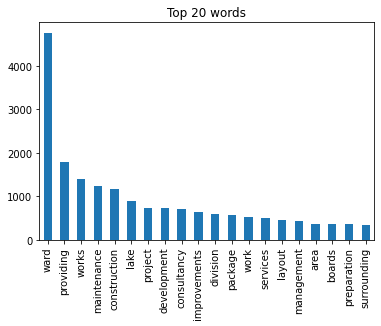

In [44]:
import matplotlib.pyplot as plt

NUM_TOP_WORDS = 20

top_20 = hero.visualization.top_words(null_key['clean_work']).head(NUM_TOP_WORDS)

# Draw the bar chart

top_20.plot.bar(rot=90, title="Top 20 words");

plt.show(block=True);

In [45]:
# Keyword category mapping
keyword_category_mapping = {
    'Roads and Infrastructure': ['roads', 'cc roads', 'road',\
                                 'excavation', 'pothole', 'potholes', 'footpath','asphalting', 'asphalt'],
    'Roads and Drains': ['roads and drains', 'drain and road', 'road and drain',\
                         'road and drains', 'footpath and drain','footpath and drains'],
    'Water and Sanitation': ['water', 'ro plant', 'water supply', 'borewell', 'pipeline',\
                             'borewells', 'drinking water'],
    'Buildings and Facilities': ['buildings', 'building', 'toilet', 'park', 'burial ground',\
                                 'community toilets', 'houses', 'play ground','play grounds',\
                                 'parks', 'gym', 'basketball court'],
    'Street Lighting': ['street lights', 'street light', 'led lights', 'streetlight',\
                        'streetlighting', 'streetlights', 'led lighting', 'illumination',\
                        'electric poles', 'led streetlights'],
	'Survelliance': ['cctv', 'cctv camera', 'fencing'],
    'Waste Management': ['dustbins', 'debris', 'debris clearance', 'cleaning', 'waste',\
                         'dust bins', 'dust bin', 'dustbin'],
    'Others': ['grants', 'emergency',\
                      'indira canteen', 'compound wall', \
                      'maintenance', 'consultancy'],
    'Drainage': ['drain', 'deweeding', 'silt', 'swd', 'ugd', 'desilting', 'culverts', 'drain', 'silt']
}

In [46]:
# Function to categorize keywords based on mapping
def categorize_keywords(keyword):
    if isinstance(keyword, str):
        if 'roads and drains' in keyword:
            return 'Roads and Drains'
        else:
            keyword_count = {}
            for category, keywords in keyword_category_mapping.items():
                count = 0
                for kw in keywords:
                    if kw in keyword:
                        count += 1
                keyword_count[category] = count

            max_category = max(keyword_count, key=keyword_count.get)
            return max_category if keyword_count[max_category] > 0 else 'Others'
    else:
        return 'Others'

# Apply categorization to keywords column
df['category'] = df['keywords'].apply(categorize_keywords)

In [47]:
df[['work_lowercase', 'keywords', 'category']]

,work_lowercase,keywords,category
0,construction and remodeling of swd 27th main b...,swd,Drainage
1,renovation of statistics office building at wa...,building,Buildings and Facilities
2,improvements and asphalting to road from mahal...,"asphalting, roads",Roads and Infrastructure
3,construction of compound wall and other infras...,"burial ground, compound wall",Buildings and Facilities
4,essential repairs and improvements to class ro...,toilets,Buildings and Facilities
...,...,...,...
44684,construction of commercial complex in vijayana...,NaN,Others
44685,package-6 comprehensive development of buildin...,buildings,Buildings and Facilities
44686,construction and remodeling of primary seconda...,"drains, culverts, swd",Drainage
44687,construction and remodeling of primarysecondar...,"drains, swd",Drainage


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 44688
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   slno                             44689 non-null  int64  
 1   id                               44689 non-null  int64  
 2   wodetails                        44689 non-null  object 
 3   contractor                       44689 non-null  object 
 4   brnumber                         44689 non-null  object 
 5   amount                           44689 non-null  int64  
 6   nett                             44689 non-null  int64  
 7   deduction                        44689 non-null  int64  
 8   work                             44689 non-null  object 
 9   contractor_name                  44689 non-null  object 
 10  number                           44689 non-null  int64  
 11  job_no                           44689 non-null  object 
 12  job_no_cleaned    

In [49]:
null_key.to_csv("C:/Users/bhosl/Py Notebooks/BBMP OpenCity/BBMP_Spends_Null_Keys_v2.csv", index=False)

In [51]:
df.to_csv("C:/Users/bhosl/Py Notebooks/BBMP OpenCity/BBMP_Spends_Categorised_New_v2.csv", index=False)